# Graphes avec networkx

## 1 : principales méthodes pour manipuler  un graphe avec networkx 

Complétez :


  Fonction          |           Rôle
--------------------|----------------------------------------
G.add_edge(S1, S2)  | ajouter une arrete
G.add_node(Noeud)   | ajouter un noeud
G.remove_node(Noeud)| enlève un sommet
$G[Sommet]$         | affiche le sommet
G.nodes()           | place l'ensemble des noeud dans le tableau G
nx.draw(G)          | dessine G
G.add_edges_from([(S1,S2), ... , (Sp, Sq)] | 

In [67]:
import networkx as nx

In [26]:
# Rappels dessins de Graphes
G = nx.Graph()
G.add_edges_from([(6,4),(4,3),(3,5), (5,2),(2,6)])
G.add_edge(2,5)
options = {
    'with_labels': True,
    'node_size': 1500,
    'node_color': "skyblue",
    'node_shape': "s", 
    'alpha': 0.5, 
    'linewidths': 10
}
nx.draw(G, **options)

In [27]:
# En sauvegardant dans un fichier le graphe dessiné
import matplotlib.pyplot as plt
fig = plt.figure()
nx.draw(G, **options)
fig.savefig("G12.png")

## 2 Quelques fonctions sur les graphes

### 2.1	Ecrire une fonction qui prend en  entrée un  graphe  et  un sommet  et  renvoie  le degré de ce sommet

In [69]:
# Exo 2.1
def degre(G,x):
    return G[x]

print(degre(G,4))

{6: {}, 3: {}}


In [70]:
# avec nx :

G.degree(4)

2

### 2.2 Ecrire de 3 façons une fonction qui prend en entrée un graphe et 2 sommets et renvoie vrai s’il y a une arête entre les deux.

In [71]:
# Exo 2.2
def edge_in(G,x,y):
        return (G[x] in G[y])

    
print(edge_in(G,3,4))

def arete_existe(G,x,y):
    if x.edges in (x,y):
        return True
    else:
        return False
    
print(arete_existe(G,3,4)) 

def possede_arete(G,x,y):
    return G.has_edge(x,y)



print(possede_arete(G,3,4)) 


Traceback (most recent call last):
  File "<input>", line 6, in <module>
  File "<input>", line 3, in edge_in
  File "<frozen _collections_abc>", line 780, in __contains__
  File "/lib/python3.11/site-packages/networkx/classes/coreviews.py", line 53, in __getitem__
    return self._atlas[key]
           ~~~~~~~~~~~^^^^^
TypeError: unhashable type: 'AtlasView'


Error: 

### 2.3	Ecrire de 2 façons une fonction qui prend en entrée un graphe et renvoie le nombre total d’arêtes dans G

In [72]:
# Exo 2.3

def nb_edges(G):
    return len(G.edges())
# ou
def nb_aretes(G):
    res = 0
    for i in G.nodes():
        res += G.degree(i)
    return res/2

print(nb_edges(G))
print(nb_aretes(G))

5
5.0


### 2.4 Vérifier expérimentalement la formule qui relie les degrés des sommets et le nombre d'arêtes dans un graphe G

In [78]:
# Vérification de la formule entre degrés et arêtes
assert nb_edges(G)*2 == sum([G.degree(s)for s in G.nodes])

### Quel est le noeud de degré maximal dans G ?

In [95]:
for i in G.nodes():
    if G.degree(i)== max([G.degree(s) for s in G.nodes]):
        print(i)

6
4
3
5
2


## 3. Parcours de graphes

Plusieurs applications sur les graphes nécessitent un examen exhaustif des sommets et des arrêtes du graphe. Autrement dit, nous avons besoin de parcourir  le graphe. Deux parcours classiques sont à connaître :
 
1. Parcours  en  **profondeur  (DFS =  Depth-First Search)**  :  à  partir  d’un  sommet  donné  S, suivre le chemin le plus loin possible (explorer un fils de S, le fils du fils de S, etc), puis faire des retours en arrière pour reprendre tous les chemins ignorés précédemment. Le parcours en profondeur s'écrit naturellement de manière **récursive**

2.	Parcours en **largeur (BFS - Breadth-First Search)** : à partir d’un sommet donné, explorer ses successeurs, puis les successeurs non explorés des successeurs, etc.


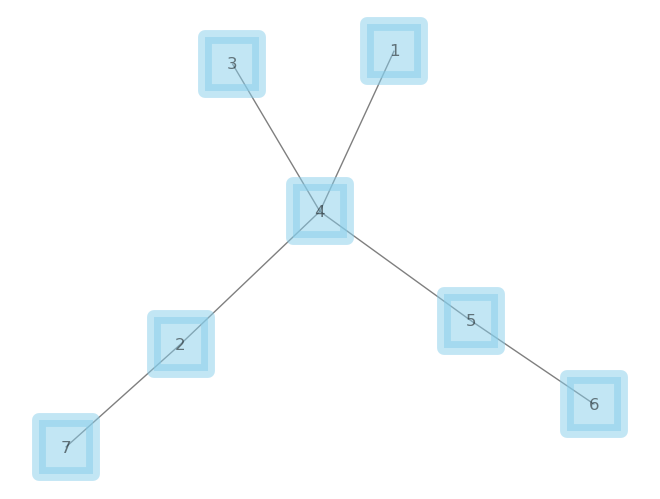

In [6]:
G1 = nx.Graph()
G1.add_edges_from([(1,4),(4,2),(4,3),(4,5),(5,6),(2,7)])
nx.draw(G1, **options)

### 3.1 Donner les parcours en profondeur et en largeur en partant du sommet 4 de G1

### 3.2 Première tentative
Quel est le problème avec la tentative suivante ?

In [5]:
# tentative de parcours 
def parcours0(graphe, depart):
    pile = [depart]
    while (len(pile)>0 ):
        noeud_courant = pile.pop()
        print(noeud_courant)
        for noeud in graphe[noeud_courant]:
            pile.append(noeud)
        if (pile > len(graphe)):
            return pile

parcours0(G,4)

Traceback (most recent call last):
  File "<input>", line 12, in <module>
NameError: name 'G' is not defined


Error: 

cccccccccccccccccc

In [1]:
# Parcours infini : pas de terminaison
parcours0(G1,4)

NameError: name 'parcours0' is not defined

### 3.3 Proposez maintenant une version itérative du parcours en profondeur (DFS)

In [12]:
# iterative
def parcours(G,a):
    pile = [a]
    atteint = [a]
    ??

In [13]:
parcours(G1,4)

### 3.4 Puis une version récursive du DFS

In [14]:
# récursive
def dfs_rec(G, depart, visités=None):
    if visités is None:
        visités = set()
    visités.add(depart)
    ../..

In [15]:
dfs_rec(G1,4)